<a href="https://colab.research.google.com/github/SarathiKrish/KMeans-Cluster/blob/main/KMeans_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Mall_Customers.csv')
df.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


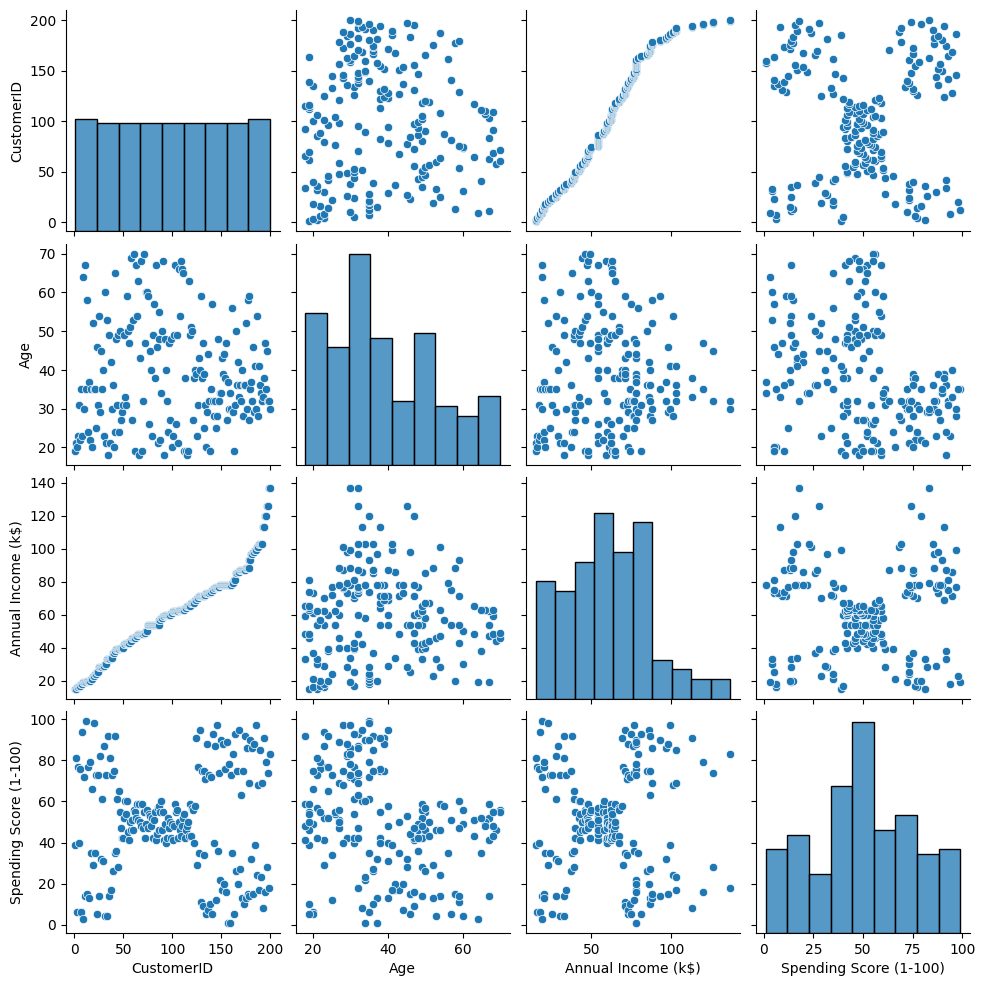

In [9]:
print(df.info())
sns.pairplot(df)
plt.show()

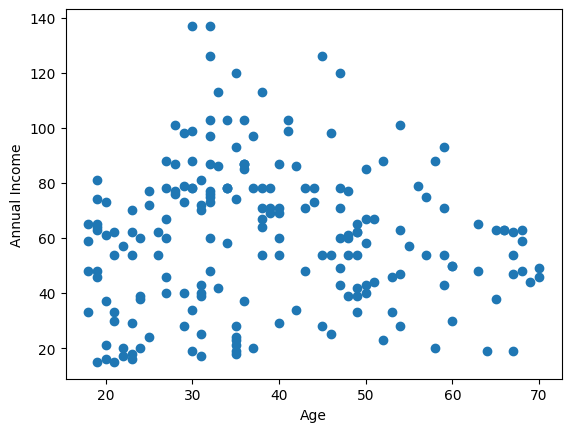

In [11]:
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

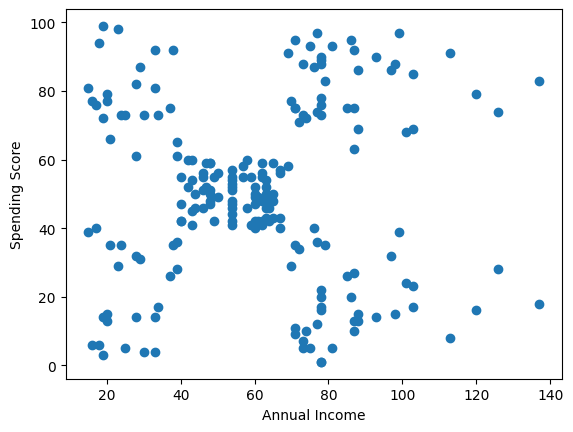

In [12]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [13]:
x =  df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

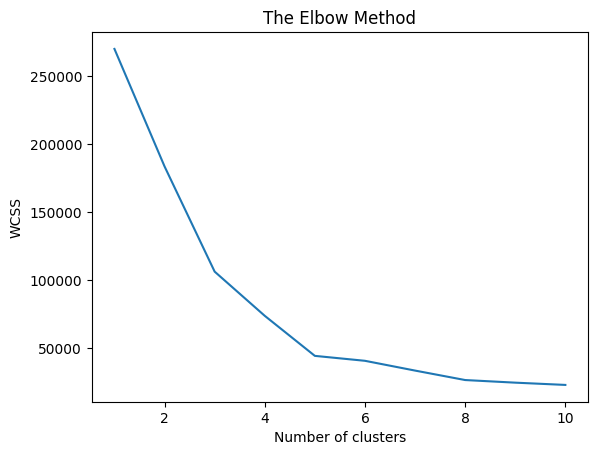

In [17]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
KMeans = KMeans(n_clusters=5)
predicted = KMeans.fit_predict(x)

#Add Cluster to Dataframe
df['cluster'] = predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


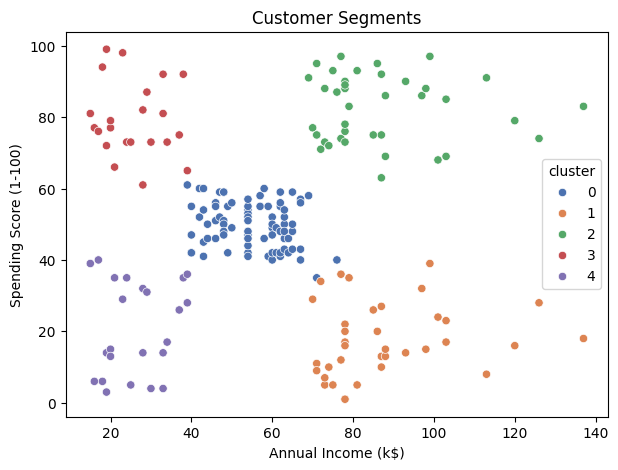

In [25]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df, palette='deep')
plt.title('Customer Segments')
plt.show()

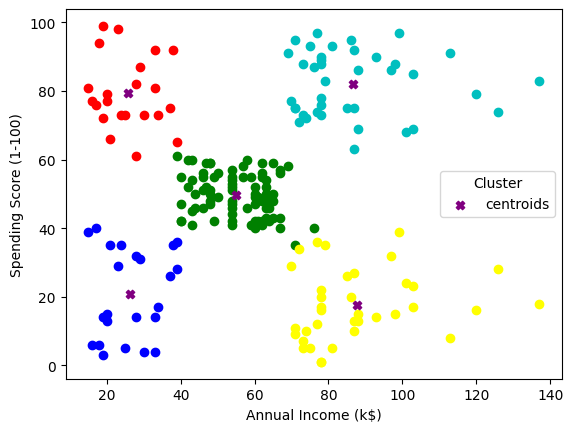

In [32]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='yellow')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='c')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='red')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='blue')

plt.scatter(KMeans.cluster_centers_[:,0], KMeans.cluster_centers_[:,1], color='purple', marker='X', label='centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title="Cluster")
plt.show()